In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('/users/anshumantewary/Downloads/Projects/Flight ticket prices - Python/Data_Train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Feature extraction from the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
#Route and Total_stops have 1 missing values each.
#Let's find and delete those, since they are very less


In [7]:
df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
df.drop([df.index[9039]], inplace = True)

In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
df['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

In [11]:
data = df.copy()

In [12]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [13]:
#Now, we need to help the model understand the date variable as day, month, and year, instead of a string

In [14]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [15]:
def date_time(dataframe, x):
    dataframe[x] = pd.to_datetime(dataframe[x])
    

In [16]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [17]:
for features in [ 'Date_of_Journey', 'Dep_Time',  'Arrival_Time'  ]:
    date_time(data, features)

In [18]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [19]:
data['Date_of_Journey'].min()   #Oldest date of journey

Timestamp('2019-01-03 00:00:00')

In [20]:
data['Date_of_Journey'].max()  #latest date of journey

Timestamp('2019-12-06 00:00:00')

In [21]:
data['journey_month'] = data[  'Date_of_Journey'].dt.month

In [22]:
data['journey_year'] = data['Date_of_Journey'].dt.year

In [23]:
data['journey_day'] = data['Date_of_Journey'].dt.day

In [24]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_year,journey_day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-03-23 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,2019,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-03-23 05:50:00,2023-03-23 13:15:00,7h 25m,2 stops,No info,7662,1,2019,5


In [25]:
#Now lets engineer the dep_time and arrival_time feature (time analysis)

In [26]:
#Lets create a function which will return the hour and the minute

def hour_minute(dataframe, x):
    dataframe[x+ '_hour'] = dataframe[x].dt.hour
    dataframe[x + '_minute'] = dataframe[x].dt.minute

In [27]:
hour_minute(data, 'Dep_Time')

In [28]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_year,journey_day,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-03-23 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,2019,24,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-03-23 05:50:00,2023-03-23 13:15:00,7h 25m,2 stops,No info,7662,1,2019,5,5,50


In [29]:
hour_minute(data, 'Arrival_Time')

In [30]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_year,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-03-23 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,2019,24,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-03-23 05:50:00,2023-03-23 13:15:00,7h 25m,2 stops,No info,7662,1,2019,5,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-03-23 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,2019,6,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-03-23 18:05:00,2023-03-23 23:30:00,5h 25m,1 stop,No info,6218,12,2019,5,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-03-23 16:50:00,2023-03-23 21:35:00,4h 45m,1 stop,No info,13302,1,2019,3,16,50,21,35


In [31]:
data.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time'], axis = 1, inplace = True)

In [32]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'journey_month', 'journey_year',
       'journey_day', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute'],
      dtype='object')

## Data Analysis

In [33]:
def dep_time_category(x):
    if (x > 4)  and (x <= 8) :
        return "Early Morning"
    elif (x > 8) and (x <= 12):
        return "Morning"
    elif (x> 12) and (x <=16):
        return "Noon"
    elif (x > 16) and (x <=20):
        return "Evening"
    elif (x > 20) and (x <= 24):
        return "Night"
    else:
        return "Late Night"

In [34]:
data['Dep_Time_hour'].apply(dep_time_category).value_counts()

Early Morning    2880
Evening          2357
Morning          2209
Noon             1731
Night            1040
Late Night        465
Name: Dep_Time_hour, dtype: int64

In [35]:
data['dep_time_category'] = data['Dep_Time_hour'].apply(dep_time_category)

<AxesSubplot:>

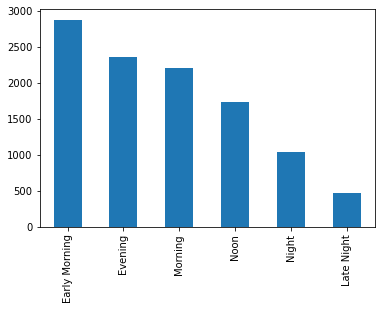

In [36]:
data['Dep_Time_hour'].apply(dep_time_category).value_counts().plot(kind = 'bar')

In [37]:
data['dep_time_category']

0                Night
1        Early Morning
2              Morning
3              Evening
4                 Noon
             ...      
10678          Evening
10679          Evening
10680    Early Morning
10681          Morning
10682          Morning
Name: dep_time_category, Length: 10682, dtype: object

In [38]:
#Lets make it a bit more attractive, and use plotly

!pip install plotly

In [39]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [40]:
# !pip install cufflinks

In [41]:
cf.go_offline()

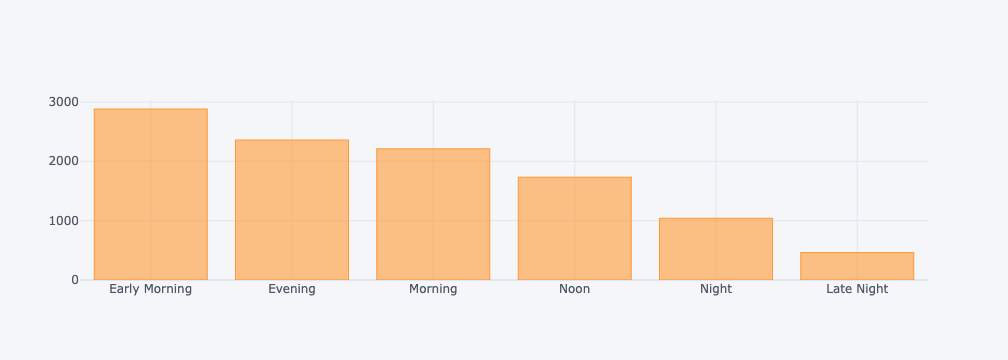

In [42]:
data['Dep_Time_hour'].apply(dep_time_category).value_counts().iplot(kind = 'bar')

In [43]:
#Feature engineering duration column, to help our model understand the data in form HH:MM (hours:minutes):
#hint, we look at the annotations, 'h' and 'm' to help segregate the data

def process_duration(x):
    if 'h' not in x:
        x = '0h ' + x
    elif 'm' not in x:
        x= x + ' 00m'
    return x
    

In [44]:
data['Duration'] = data['Duration'].apply(process_duration)

In [45]:
data['Duration'][0].split(' ')[0]

'2h'

In [46]:
data['Duration'][0].split(' ')[1]

'50m'

In [47]:
int(data['Duration'][0].split(' ')[0][0:1])

2

In [48]:
int(data['Duration'][0].split(' ')[1][0:-1])

50

In [49]:
data['Duration_hours'] = data['Duration'].apply(lambda x:(int(x.split(' ')[0][0:-1])) )   

In [50]:
data['Duration_minutes'] = data['Duration'].apply(lambda x:(int(x.split(' ')[1][0:-1])) )

In [51]:
#Can be done either way, either using lambda or using a function
def hours(x):
    x = int(x.split(' ')[0][0:-1])
    return x        

In [52]:
data['Duration'].apply(hours)

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration, Length: 10682, dtype: int64

In [53]:
#data.head(5)

In [54]:
data['total_duration_minutes'] = data['Duration_hours']*60 + data['Duration_minutes']

In [55]:
#data.head(5)

In [56]:
data.dtypes

Airline                   object
Source                    object
Destination               object
Route                     object
Duration                  object
Total_Stops               object
Additional_Info           object
Price                      int64
journey_month              int64
journey_year               int64
journey_day                int64
Dep_Time_hour              int64
Dep_Time_minute            int64
Arrival_Time_hour          int64
Arrival_Time_minute        int64
dep_time_category         object
Duration_hours             int64
Duration_minutes           int64
total_duration_minutes     int64
dtype: object

In [57]:
#eval('2*50+1')

In [58]:
#Alternatively we could have used an evaluation function
#Can be done either way!

data['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10682, dtype: int64

In [59]:
#To understand the relation b/w price and duation, lets use a scatter plot

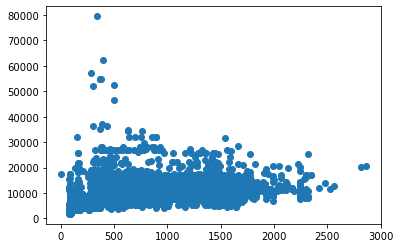

In [60]:
plt.scatter(x = 'total_duration_minutes', y = 'Price', data = data)
plt.show()

In [61]:
#Lets use an lm plot which is a regression and a scatter plot from seaborn library, and looks better!

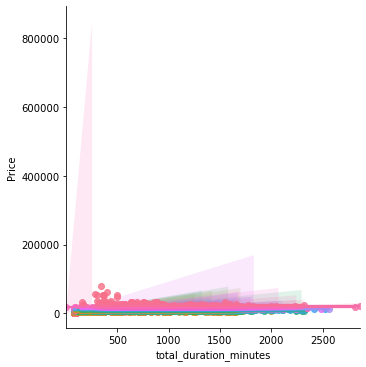

In [62]:
sns.lmplot(x = 'total_duration_minutes', y = 'Price', data = data, hue = 'Price', legend=False)

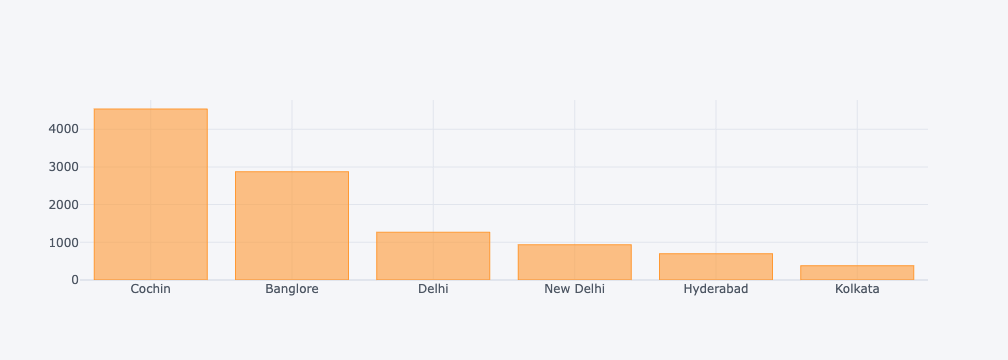

In [63]:
df['Destination'].value_counts().iplot(kind = 'bar')

In [64]:
#Cochin is the highest final destination flights

In [65]:
#Let's now do some bivariate analysis

In [66]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_year,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,dep_time_category,Duration_hours,Duration_minutes,total_duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,2019,24,22,20,1,10,Night,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,2019,5,5,50,13,15,Early Morning,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 00m,2 stops,No info,13882,9,2019,6,9,25,4,25,Morning,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,2019,5,18,5,23,30,Evening,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,2019,3,16,50,21,35,Noon,4,45,285


In [67]:
data[data['Airline'] == 'Jet Airways']['Route'].value_counts()

CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
BOM → BDQ → DEL → HYD      2
DEL → DED → BOM → COK      2
BOM → DED → DEL → HYD      1
BOM → UDR → DEL → HYD      1
DEL → CCU → BOM → COK      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → VNS → DEL → HYD      1
Name: Route, dtype: int64

In [68]:
#Alternatively we can use group by and sort values on Route

In [69]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending = False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

In [70]:
#Airline vs Price analysis

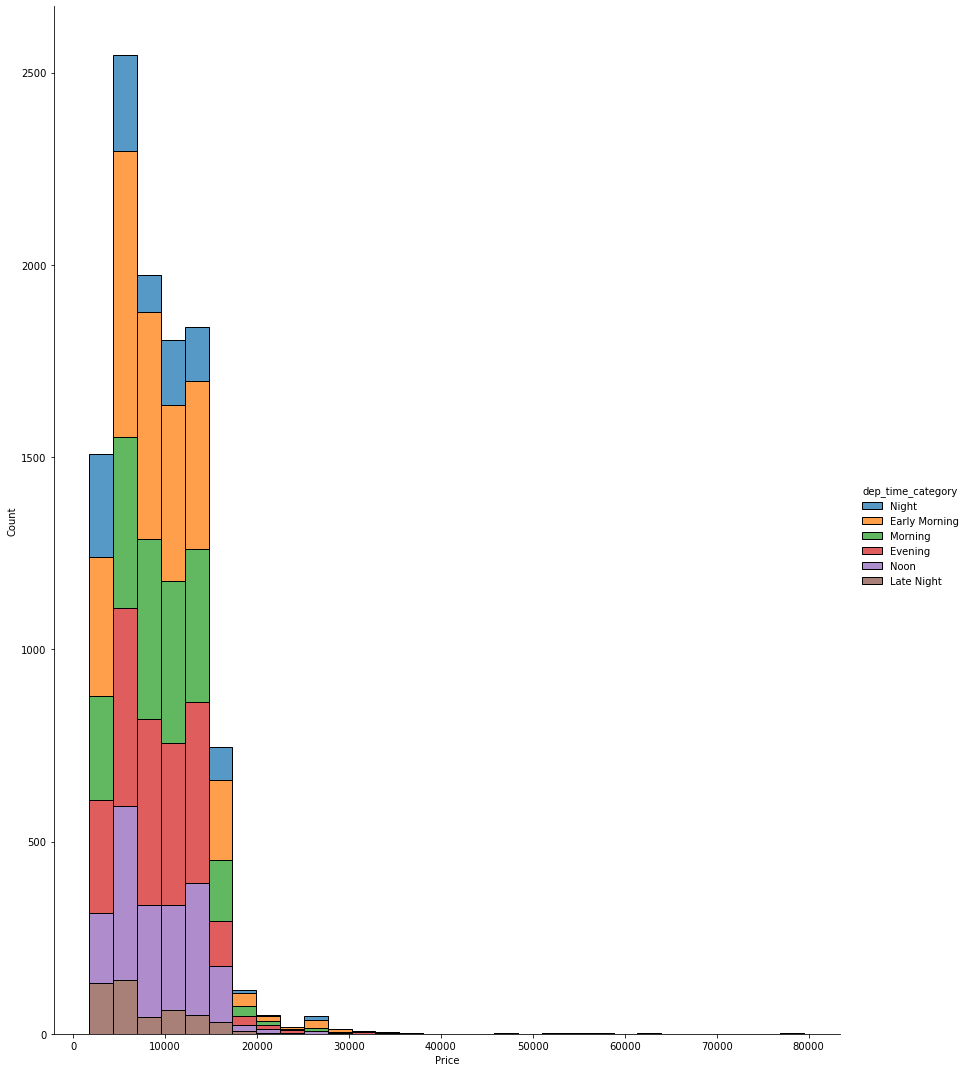

In [71]:
sns.displot(data, x = data['Price'], bins = 30, hue = 'dep_time_category', multiple = 'stack', height=15, aspect=0.8)

In [72]:
#plt.figure(figsize = (45,20))
#sns.displot(data, x = data['Price'], bins = 30, col = 'Airline', height = 10, aspect = 0.8)
#plt.show()

In [73]:
#Lets do something crazy, plot distribution of flight prices based on departure category, price and Airline

In [74]:
#data.head(2)

#list(enumerate(data.Airline.value_counts().index))

In [75]:
#fig, ax = plt.subplots(2,3)
#g = sns.FacetGrid(data, col = 'dep_time_category', legend_out= False )
#plt.xticks(rotation = 'vertical')
#plt.tight_layout()
#g.map(sns.histplot, x = data['Airline'])


In [76]:
#plt.figure(figsize = (45,10))

#for i in enumerate(data.Airline.value_counts().index):
   # plt.subplots(12,6, (i[0]+1))
    #sns.histplot(data, x = 'Price', bins = 30, col = data[i[1]], height = 5, aspect = 0.8)
   # plt.show()

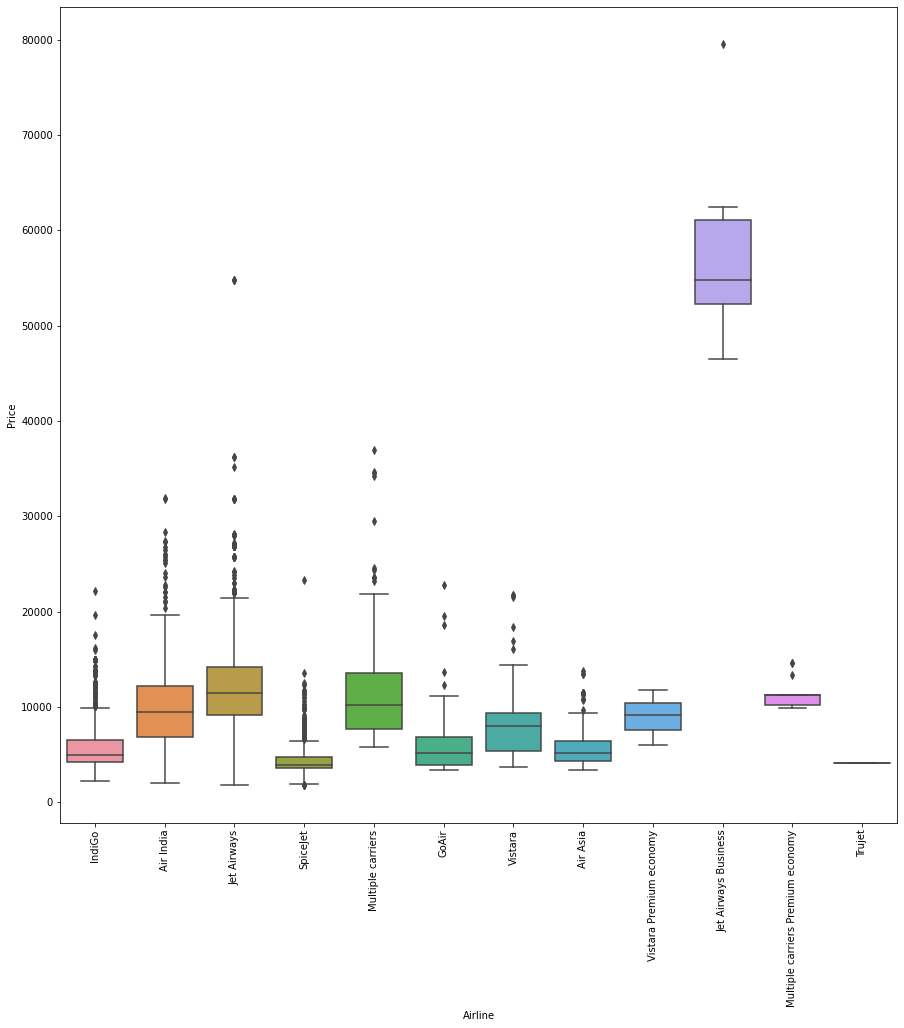

In [77]:
plt.figure(figsize = (15,15))
sns.boxplot(y = 'Price', x = 'Airline', data = data)
plt.xticks(rotation = 'vertical')
plt.show()

In [78]:
#To get distribution and boxplot, together it is good to use violin plot

## Violin plot

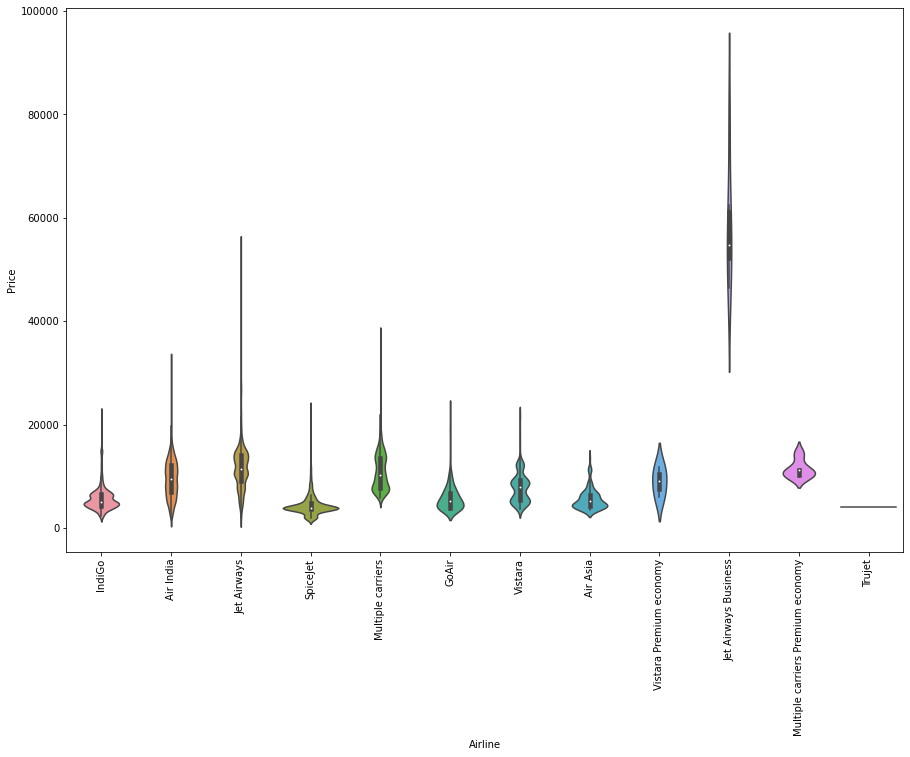

In [79]:
plt.figure(figsize = (15,10))
sns.violinplot(y = 'Price', x = 'Airline', data = data)
plt.xticks(rotation = 'vertical')
plt.show()

## Applying One Hot Encoding

In [80]:
data.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_year,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,dep_time_category,Duration_hours,Duration_minutes,total_duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,2019,24,22,20,1,10,Night,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,2019,5,5,50,13,15,Early Morning,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 00m,2 stops,No info,13882,9,2019,6,9,25,4,25,Morning,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,2019,5,18,5,23,30,Evening,5,25,325


In [81]:
np.round(data['Additional_Info'].value_counts()/len(data)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
Red-eye flight                   0.01
2 Long layover                   0.01
1 Short layover                  0.01
Name: Additional_Info, dtype: float64

In [82]:
data.drop(['Additional_Info'], axis = 1, inplace = True)

In [83]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,journey_month,journey_year,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,dep_time_category,Duration_hours,Duration_minutes,total_duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,3,2019,24,22,20,1,10,Night,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,1,2019,5,5,50,13,15,Early Morning,7,25,445


In [84]:
#data.drop(['Route', 'journey_year', 'total_duration_minutes'], axis = 1, inplace = True) #journey year is constant, total duration minutes is unnecessary, and route is signified by the number of stops

In [85]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,journey_month,journey_year,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,dep_time_category,Duration_hours,Duration_minutes,total_duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,3,2019,24,22,20,1,10,Night,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,1,2019,5,5,50,13,15,Early Morning,7,25,445


In [86]:
#Source is a categorical variable, we need to convert it into a numerical one

In [87]:
#datatype ---- Object is generally categorical in nature

In [88]:
data.dtypes

Airline                   object
Source                    object
Destination               object
Route                     object
Duration                  object
Total_Stops               object
Price                      int64
journey_month              int64
journey_year               int64
journey_day                int64
Dep_Time_hour              int64
Dep_Time_minute            int64
Arrival_Time_hour          int64
Arrival_Time_minute        int64
dep_time_category         object
Duration_hours             int64
Duration_minutes           int64
total_duration_minutes     int64
dtype: object

In [89]:
#Lets differentiate the categorical and the non-categorical variables 

categorical_column = [col for col in data.columns if data[col].dtype == 'object']   #List comparison

In [90]:
numerical_column = [col for col in data.columns if data[col].dtype != 'object']

In [91]:
data['Source'].unique()   #This is nominal data

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [92]:
#For ordinal data, we can use label encoder (ordinal is: which follows a certain order: low high, first second third etc)

#For nominal data, we use one hot encoding i.e the data which does not follow order, like Source here is

In [93]:
data['Source'].apply(lambda x: 1 if x== "Banglore" else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [94]:
#Lets create a pd.dummies funciton manually using a simple  for loop

for category in data['Source'].unique():
    data['source_'+ category] =data['Source'].apply(lambda x: 1 if x== category else 0)

In [95]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,journey_month,journey_year,journey_day,...,Arrival_Time_minute,dep_time_category,Duration_hours,Duration_minutes,total_duration_minutes,source_Banglore,source_Kolkata,source_Delhi,source_Chennai,source_Mumbai
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,3,2019,24,...,10,Night,2,50,170,1,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,1,2019,5,...,15,Early Morning,7,25,445,0,1,0,0,0


In [96]:
#Target guided encoding of data

airlines=data.groupby('Airline')['Price'].mean().sort_values().index

In [97]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [98]:
#list(enumerate(airlines))

In [99]:
dict1 = {key:index for index,key in enumerate(airlines)}

In [100]:
data['Airline'] = data['Airline'].map(dict1)


In [101]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [102]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [103]:
#New Delhi and Delhi are same and have same airport

In [104]:
data['Destination'].replace('New Delhi', 'Delhi', inplace = True)

In [105]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [106]:
#Now lets again target encode the feature, like we did for source

In [107]:
destination = data.groupby('Destination')['Price'].mean().sort_values().index

In [108]:
dict2 = {key:index for index,key in enumerate(destination)}
    

In [109]:
data['Destination'] = data['Destination'].map(dict2)

In [110]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [111]:
[col for col in data.columns if data[col].dtypes == 'object']

['Source', 'Route', 'Duration', 'Total_Stops', 'dep_time_category']

In [112]:
#These columns are yet categorical

In [113]:
#Lets perform manual enconding on 'Total_stops'

In [114]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [115]:
#What I want to do is, whereever there is non-stop, return 0, 2 stops: 2, etc etc

In [116]:
dict3 = {'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}

In [117]:
dict3

{'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}

In [118]:
data['Total_Stops']=data['Total_Stops'].map(dict3)

In [119]:
data['Total_Stops'].dtype

dtype('int64')

In [120]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,journey_month,journey_year,journey_day,...,Arrival_Time_minute,dep_time_category,Duration_hours,Duration_minutes,total_duration_minutes,source_Banglore,source_Kolkata,source_Delhi,source_Chennai,source_Mumbai
0,3,Banglore,2,BLR → DEL,2h 50m,0,3897,3,2019,24,...,10,Night,2,50,170,1,0,0,0,0
1,7,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,7662,1,2019,5,...,15,Early Morning,7,25,445,0,1,0,0,0


## Lets detect outliers

In [121]:
#Plots: Distribution, Hitogram, Boxplot

def plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1)
    plt.figure(figsize = (15,20))
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2)
    sns.histplot(df[col], ax=ax3, kde = False)  #Kde - kernal density estimation = False, return histogram

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



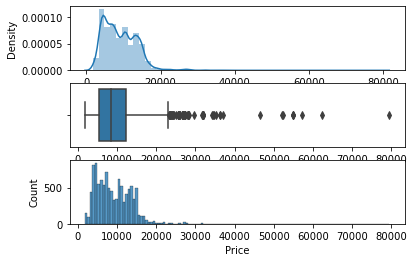

<Figure size 1080x1440 with 0 Axes>

In [122]:
plot(data, 'Price')

In [123]:
#Let's say, we will impute the outliers by the median. And not mean because, mean gets badly affected by outliers

In [124]:
data['Price'] = np.where(data['Price']>35000, data['Price'].median(), data['Price'])

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



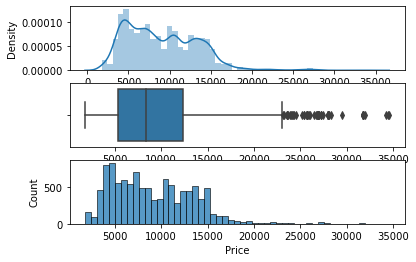

<Figure size 1080x1440 with 0 Axes>

In [125]:
plot(data, 'Price')

In [126]:
#The skewness has been distributed

In [127]:
#Lets perform feature selection

In [128]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,journey_month,journey_year,journey_day,...,Arrival_Time_minute,dep_time_category,Duration_hours,Duration_minutes,total_duration_minutes,source_Banglore,source_Kolkata,source_Delhi,source_Chennai,source_Mumbai
0,3,Banglore,2,BLR → DEL,2h 50m,0,3897.0,3,2019,24,...,10,Night,2,50,170,1,0,0,0,0
1,7,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,7662.0,1,2019,5,...,15,Early Morning,7,25,445,0,1,0,0,0


In [129]:
#Lets remove Source and Duration

In [130]:
data.drop(['Source', 'Destination', 'Route'], axis = 1, inplace = True)

In [131]:
data.head()

,Airline,Duration,Total_Stops,Price,journey_month,journey_year,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,dep_time_category,Duration_hours,Duration_minutes,total_duration_minutes,source_Banglore,source_Kolkata,source_Delhi,source_Chennai,source_Mumbai
0,3,2h 50m,0,3897.0,3,2019,24,22,20,1,10,Night,2,50,170,1,0,0,0,0
1,7,7h 25m,2,7662.0,1,2019,5,5,50,13,15,Early Morning,7,25,445,0,1,0,0,0
2,10,19h 00m,2,13882.0,9,2019,6,9,25,4,25,Morning,19,0,1140,0,0,1,0,0
3,3,5h 25m,1,6218.0,12,2019,5,18,5,23,30,Evening,5,25,325,0,1,0,0,0
4,3,4h 45m,1,13302.0,1,2019,3,16,50,21,35,Noon,4,45,285,1,0,0,0,0


In [132]:
data.drop(['Duration', 'dep_time_category'], axis = 1, inplace = True)

In [133]:
data.dtypes

Airline                     int64
Total_Stops                 int64
Price                     float64
journey_month               int64
journey_year                int64
journey_day                 int64
Dep_Time_hour               int64
Dep_Time_minute             int64
Arrival_Time_hour           int64
Arrival_Time_minute         int64
Duration_hours              int64
Duration_minutes            int64
total_duration_minutes      int64
source_Banglore             int64
source_Kolkata              int64
source_Delhi                int64
source_Chennai              int64
source_Mumbai               int64
dtype: object

## Let's perform feature selection

In [134]:
from sklearn.feature_selection import mutual_info_regression

In [135]:
X = data.drop(['Price'], axis = 1)

In [136]:
Y = data['Price']

In [137]:
mutual_info_regression(X,Y)

array([0.97950623, 0.78973691, 0.23959422, 0.        , 0.18982658,
       0.33643317, 0.25299576, 0.40108021, 0.35237933, 0.47180827,
       0.33464775, 0.49998421, 0.39829891, 0.45906974, 0.52698852,
       0.1309029 , 0.19715807])

In [138]:
features = pd.DataFrame(mutual_info_regression(X,Y), index = X.columns)

In [139]:
features
features.columns=['Importance']
features.sort_values('Importance', ascending = False)

#mutual_info_regression typically measures the dependency between 2 features and is non negative

,Importance
Airline,0.980631
Total_Stops,0.792608
source_Delhi,0.517639
total_duration_minutes,0.492751
Duration_hours,0.472158
source_Kolkata,0.466463
Arrival_Time_hour,0.408386
source_Banglore,0.387991
Duration_minutes,0.343591
Arrival_Time_minute,0.341714


<AxesSubplot:>

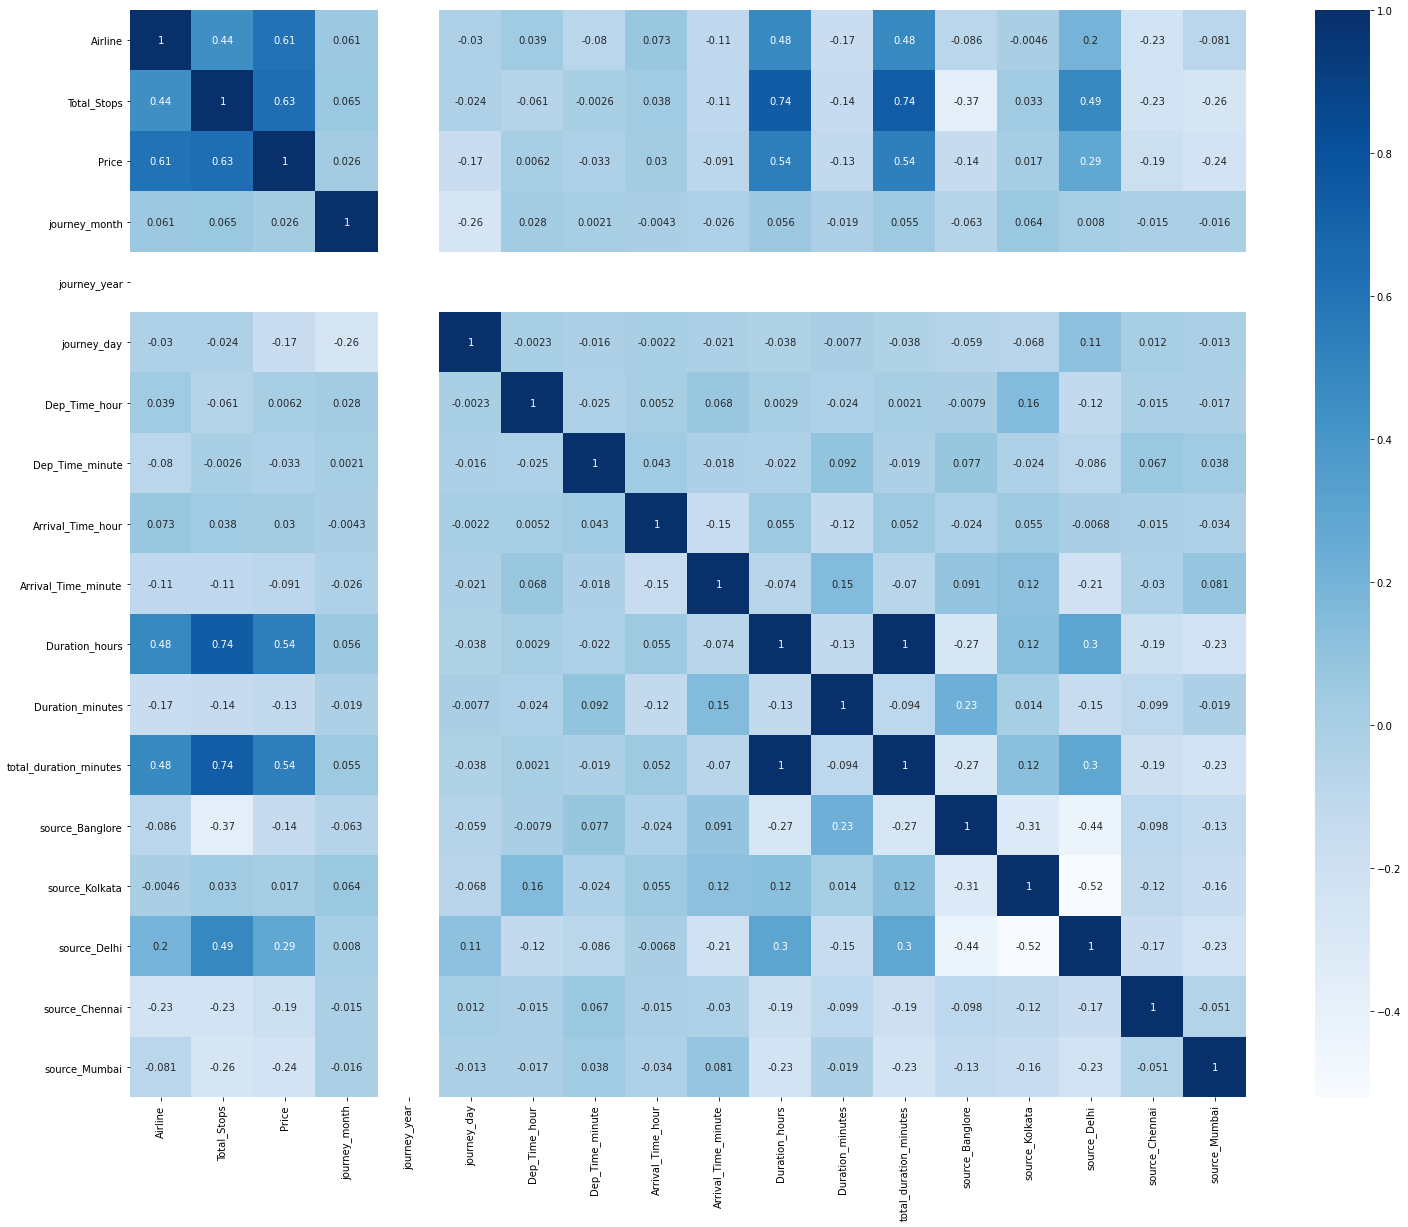

In [140]:
plt.figure(figsize = (25,20))
sns.heatmap(data.corr(), annot = True, cmap="Blues")

In [141]:
data.corr().loc[:,'Price'].sort_values(ascending = False)

Price                     1.000000
Total_Stops               0.633635
Airline                   0.612236
Duration_hours            0.544661
total_duration_minutes    0.542438
source_Delhi              0.291908
Arrival_Time_hour         0.030389
journey_month             0.025825
source_Kolkata            0.017079
Dep_Time_hour             0.006235
Dep_Time_minute          -0.033104
Arrival_Time_minute      -0.090662
Duration_minutes         -0.126571
source_Banglore          -0.142335
journey_day              -0.165545
source_Chennai           -0.187463
source_Mumbai            -0.241168
journey_year                   NaN
Name: Price, dtype: float64

In [142]:
data.corr().iloc[:,2].sort_values(ascending = False)

Price                     1.000000
Total_Stops               0.633635
Airline                   0.612236
Duration_hours            0.544661
total_duration_minutes    0.542438
source_Delhi              0.291908
Arrival_Time_hour         0.030389
journey_month             0.025825
source_Kolkata            0.017079
Dep_Time_hour             0.006235
Dep_Time_minute          -0.033104
Arrival_Time_minute      -0.090662
Duration_minutes         -0.126571
source_Banglore          -0.142335
journey_day              -0.165545
source_Chennai           -0.187463
source_Mumbai            -0.241168
journey_year                   NaN
Name: Price, dtype: float64

In [143]:
#Based on the 2 types of analysis, #mutual_info_regression  and #corrplot, we find that all the features are somewhat contributing 
#to the price of the plane

## Let's now build a ML model, which can predict the prices

In [144]:
#Lets use a basic regression model

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [146]:
reg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=3)

In [147]:
reg.fit(x_train, y_train)

LinearRegression()

In [148]:
y_pred = reg.predict(x_test)
y_pred

array([ 8255.33296845, 10940.05768291, 11062.3492713 , ...,
        6934.90773681,  5904.54300849,  8446.18020165])

## Now what we want is, to save this model for future references

In [150]:
#!pip install pickle-mixin

In [166]:
import pickle

In [167]:
file = open(r'/users/anshumantewary/Downloads/Projects/Flight ticket prices - Python/linear_model.pkl', 'wb')  #wb = write binart

In [168]:
pickle.dump(reg, file)  #The coefficient of this model was stored in the dataset, not the entire model

In [169]:
#Lets predict using the stored file, we have to open it in a read binary mode (rb)

model = open(r'/users/anshumantewary/Downloads/Projects/Flight ticket prices - Python/linear_model.pkl', 'rb')

In [170]:
model

<_io.BufferedReader name='/users/anshumantewary/Downloads/Projects/Flight ticket prices - Python/linear_model.pkl'>

In [174]:
reg_test= pickle.load(model)

In [175]:
reg_test.predict(x_test)

array([ 8255.33296845, 10940.05768291, 11062.3492713 , ...,
        6934.90773681,  5904.54300849,  8446.18020165])

In [176]:
##Prints the same values as the original model, i.e works in the same way

In [177]:
def mape (y_true, y_pred):  #Mean absolute prediction error
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    return np.mean(np.abs((y_true - y_pred)/y_true))*100

In [178]:
mape(y_test, y_pred)

25.368283258600812

## Let's now automate using a function which will return all the scores necessary to evaluate that model

In [186]:
def predict(ml_model):
    model = ml_model.fit(x_train, y_train)
    print("The training performance is : {}".format(model.score(x_train, y_train)))
    print('\n')
    y_prediction = model.predict(x_test)
    print("The predictions are: {}". format(y_prediction))
    print('\n')
    
    from sklearn import metrics
    r2_score = metrics.r2_score(y_test, y_prediction)
    print("The R2 score is : {}".format(r2_score))
    print('MSE is :', metrics.mean_squared_error(y_test, y_prediction))
    print('MAE is :', metrics.mean_absolute_error(y_test, y_prediction))
    print('RMSE is :', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))
    print('MAPE is :', mape(y_test, y_prediction))
    
    sns.displot(y_test - y_prediction)

In [187]:
from sklearn.ensemble import RandomForestRegressor

The training performance is : 0.9516158503402774


The predictions are: [ 6673.43       11551.9155     10924.72       ...  4969.91042857
  6179.83        6384.37      ]


The R2 score is : 0.7978456111111828
MSE is : 3916700.184759367
MAE is : 1196.7080382563024
RMSE is : 1979.0654826860496
MAPE is : 13.52779182972386


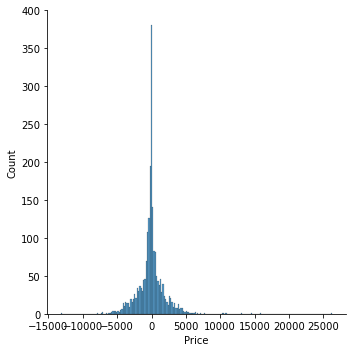

In [188]:
predict(RandomForestRegressor())

## Hyperparameter tuning using Randomised Search CV, Grid Search CV

In [189]:
from sklearn.model_selection import RandomizedSearchCV


In [192]:
reg_rf = RandomForestRegressor()

In [195]:
np.linspace(start = 1000, stop = 1200, num = 6)

array([1000., 1040., 1080., 1120., 1160., 1200.])

In [199]:
n_estimators =[int(x) for x in np.linspace(start = 1000, stop = 1200, num = 6)] #We need to feed a list

max_featues = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 4)]

min_samples_split = [5,10,15,20,100]

In [203]:
random_grid = {
    'n_estimators':n_estimators,
    'max_features':max_featues,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [205]:
rf_Random = RandomizedSearchCV(reg_rf, param_distributions=random_grid, cv = 3, verbose=2, n_jobs = -1)

In [207]:
rf_Random.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 20,
                                                              100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [209]:
rf_Random.best_params_

{'n_estimators': 1040,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 30}

In [210]:
pred_2= rf_Random.predict(x_test)

In [213]:
from sklearn.metrics import r2_score
r2_score(y_test, pred_2)

0.8243969004015573

In [214]:
# A more accurate model, explaining 82% of the variance